# SHAP Explainer

SHAP values and feature importance interpretation for best model.

In [7]:
import joblib
import pandas as pd
import shap

# 1) Load model
best_model = joblib.load("../models/best_model.joblib")


In [14]:

# Summarize the best model
# 1.1) Summarize best model type and parameters
print("🔍 Best Model Summary")
print("-" * 30)
print(f"Model class: {type(best_model).__name__}")
print("\nParameters:")
for name, value in best_model.get_params().items():
    print(f"  • {name}: {value}")

# If available, show feature importances
if hasattr(best_model, "feature_importances_"):
    print("\nFeature importances (first 10):")
    import numpy as np
    fi = best_model.feature_importances_
    for idx, imp in enumerate(fi[:10]):
        print(f"  {idx:2d}: {imp:.4f}")

🔍 Best Model Summary
------------------------------
Model class: RandomForestRegressor

Parameters:
  • bootstrap: True
  • ccp_alpha: 0.0
  • criterion: squared_error
  • max_depth: None
  • max_features: 1.0
  • max_leaf_nodes: None
  • max_samples: None
  • min_impurity_decrease: 0.0
  • min_samples_leaf: 1
  • min_samples_split: 2
  • min_weight_fraction_leaf: 0.0
  • monotonic_cst: None
  • n_estimators: 100
  • n_jobs: None
  • oob_score: False
  • random_state: 42
  • verbose: 0
  • warm_start: False

Feature importances (first 10):
   0: 0.1000
   1: 0.0564
   2: 0.0702
   3: 0.1011
   4: 0.1652
   5: 0.0791
   6: 0.0733
   7: 0.0685
   8: 0.0705
   9: 0.1004


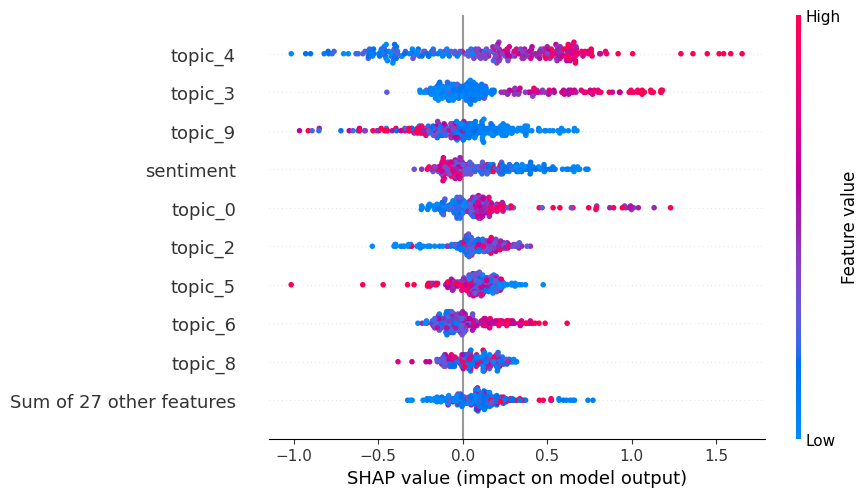

In [10]:

# 2) Load features and split into train/test (or load pre-split X_test)
df = pd.read_csv("../data/processed/features_lda_monthly.csv", parse_dates=["month"])
# … re-create X_test as in your training script …
features = [c for c in df.columns if c.startswith("topic_") or c.startswith("publication_")] + ["sentiment"]
split_idx = int(len(df) * 0.8)
X_test = df[features].iloc[split_idx:]

# 3) Compute SHAP values
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# 4) Visualize
shap.plots.beeswarm(shap_values)

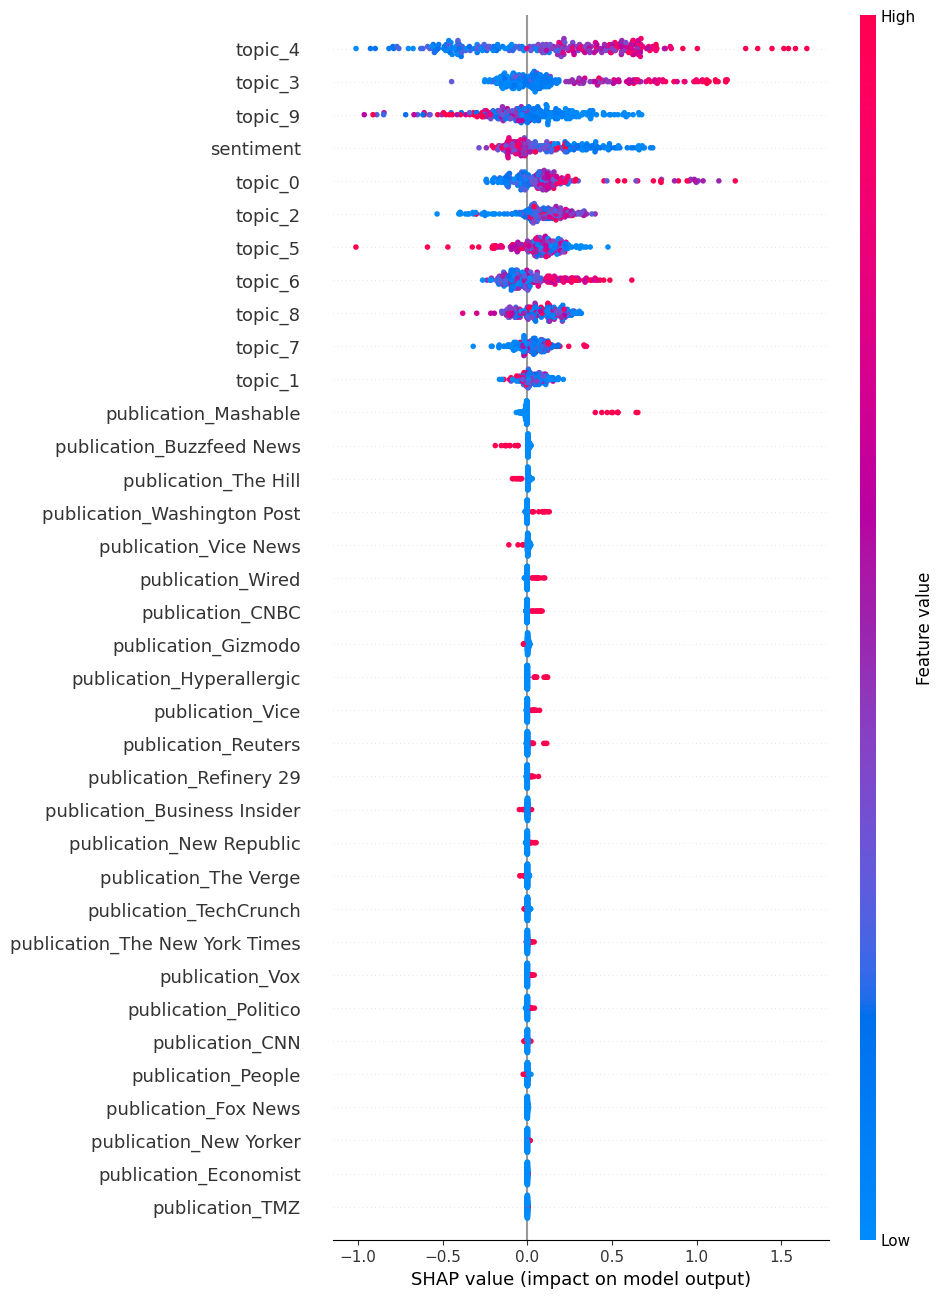

In [3]:
shap.plots.beeswarm(shap_values, max_display=len(X_test.columns))
